In [1]:
from IPython.display import Image 
from tqdm import tqdm_notebook

In [2]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777) 
learning_rate = 0.1

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W0911 15:37:13.707423  7688 deprecation.py:323] From <ipython-input-2-e7185b71d730>:25: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in tqdm_notebook(range(201)):
        cost_val, W_val, _=sess.run(
        [cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
        if step%20 ==0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".
                  format(step, cost_val, W_val))
    print("-"*60)
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 5.732029914855957 
 Weight : 
[[ 0.7288166   0.7153621  -1.1801533 ]
 [-0.57753736 -0.12988332  1.6072978 ]
 [ 0.48373488 -0.51433605 -2.02127   ]]

 Step : 20 
 Cost : 1.6610023975372314 
 Weight : 
[[ 0.35837555  0.7006911  -0.79504126]
 [-0.5218104  -0.14752226  1.5692096 ]
 [-0.00524238 -0.21694626 -1.8296826 ]]

 Step : 40 
 Cost : 1.4070580005645752 
 Weight : 
[[ 0.08632907  0.6441535  -0.4664571 ]
 [-0.2783146  -0.19541715  1.3736086 ]
 [-0.14105877 -0.16434805 -1.7464645 ]]

 Step : 60 
 Cost : 1.2188069820404053 
 Weight : 
[[-0.14574493  0.58043295 -0.17066272]
 [-0.11075758 -0.17286885  1.1835033 ]
 [-0.22450294 -0.17601475 -1.6513535 ]]

 Step : 80 
 Cost : 1.0710084438323975 
 Weight : 
[[-0.3455095   0.51687723  0.0926576 ]
 [ 0.01382125 -0.11677328  1.002829  ]
 [-0.28096503 -0.21812563 -1.5527805 ]]

 Step : 100 
 Cost : 0.9537602663040161 
 Weight : 
[[-0.52009284  0.45806158  0.32605675]
 [ 0.11236366 -0.04872473  0.83623797]
 [-0.32143888 -0.2711

In [5]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  
learning_rate = 1.5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0 or step<5:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))
    print("-"*60)
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 4.536120414733887 
 Weight : 
[[-1.9139316   1.1026288   1.794597  ]
 [-1.9765708   3.0702066   0.4536147 ]
 [-4.1118226   1.2449874   0.32312405]]

 Step : 1 
 Cost : 22.07525634765625 
 Weight : 
[[-1.5389316   0.16525811  2.3569677 ]
 [ 0.46092916 -0.8670306   1.953352  ]
 [-1.6743226  -2.5048656   1.6354772 ]]

 Step : 2 
 Cost : 22.286516189575195 
 Weight : 
[[-1.1639359   0.72775644  1.4194736 ]
 [ 2.8984206   1.757966   -3.1091356 ]
 [ 0.7631731   0.30763245 -3.6145167 ]]

 Step : 3 
 Cost : 11.074285507202148 
 Weight : 
[[-2.0958228  1.0971434  1.9819736]
 [-0.7793081  3.935695  -1.6091357]
 [-2.9448993  2.7032046 -2.3020167]]

 Step : 4 
 Cost : 28.454124450683594 
 Weight : 
[[-1.7208228e+00  1.5964341e-01  2.5444736e+00]
 [ 1.6581919e+00 -1.8050671e-03 -1.0913575e-01]
 [-5.0739932e-01 -1.0467954e+00 -9.8951674e-01]]

 Step : 20 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 Step : 40 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [na

In [7]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  
learning_rate = 1e-5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 3.1290576457977295 
 Weight : 
[[-1.3092784   0.9677886   1.614925  ]
 [ 0.30826908  0.32995102 -0.39388904]
 [ 0.96012723  1.6256702  -0.1544437 ]]

 Step : 20 
 Cost : 3.125328540802002 
 Weight : 
[[-1.3092378   0.9676765   1.6149966 ]
 [ 0.3085638   0.32946226 -0.39369473]
 [ 0.96042883  1.6251981  -0.15427174]]

 Step : 40 
 Cost : 3.1216015815734863 
 Weight : 
[[-1.3091987   0.96756446  1.6150681 ]
 [ 0.30885825  0.3289735  -0.39350042]
 [ 0.96073043  1.624726   -0.15409978]]

 Step : 60 
 Cost : 3.1178762912750244 
 Weight : 
[[-1.3091606   0.9674524   1.6151396 ]
 [ 0.3091527   0.32848474 -0.3933061 ]
 [ 0.9610315   1.624254   -0.15392782]]

 Step : 80 
 Cost : 3.1141552925109863 
 Weight : 
[[-1.3091224   0.96734154  1.6152111 ]
 [ 0.30944714  0.32799646 -0.3931118 ]
 [ 0.9613319   1.6237819  -0.15375586]]

 Step : 100 
 Cost : 3.110436201095581 
 Weight : 
[[-1.3090843   0.9672307   1.6152827 ]
 [ 0.30974135  0.3275083  -0.39291748]
 [ 0.9616323   1.62330

In [9]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])


x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 x_data : 
[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]  

 y_data : 
[[831.659973]
 [828.070007]
 [824.159973]
 [819.23999 ]
 [818.97998 ]
 [820.450012]
 [813.669983]
 [809.559998]]


In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("Step : {}, \t Cost : {}".format(step, cost_val))


Step : 0, 	 Cost : 164811898880.0
Step : 1, 	 Cost : 1.8107558256403032e+26
Step : 2, 	 Cost : inf
Step : 3, 	 Cost : inf
Step : 4, 	 Cost : inf
Step : 5, 	 Cost : inf
Step : 6, 	 Cost : nan
Step : 7, 	 Cost : nan
Step : 8, 	 Cost : nan
Step : 9, 	 Cost : nan
Step : 10, 	 Cost : nan
Step : 11, 	 Cost : nan
Step : 12, 	 Cost : nan
Step : 13, 	 Cost : nan
Step : 14, 	 Cost : nan
Step : 15, 	 Cost : nan
Step : 16, 	 Cost : nan
Step : 17, 	 Cost : nan
Step : 18, 	 Cost : nan
Step : 19, 	 Cost : nan
Step : 20, 	 Cost : nan
Step : 21, 	 Cost : nan
Step : 22, 	 Cost : nan
Step : 23, 	 Cost : nan
Step : 24, 	 Cost : nan
Step : 25, 	 Cost : nan
Step : 26, 	 Cost : nan
Step : 27, 	 Cost : nan
Step : 28, 	 Cost : nan
Step : 29, 	 Cost : nan
Step : 30, 	 Cost : nan
Step : 31, 	 Cost : nan
Step : 32, 	 Cost : nan
Step : 33, 	 Cost : nan
Step : 34, 	 Cost : nan
Step : 35, 	 Cost : nan
Step : 36, 	 Cost : nan
Step : 37, 	 Cost : nan
Step : 38, 	 Cost : nan
Step : 39, 	 Cost : nan
Step : 40, 	 Cost : 

In [11]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [12]:
np.min(a)

0

In [13]:
np.min(a, axis=1)

array([0, 2])

In [14]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n\n min.data :\n {min}, \n\n numerator :\n {numerator}, \n\n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))

    return numerator / (denominator + 1e-5)


xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])


xy = MinMaxScaler(xy)
print(" xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print("\n x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 max.data :
 [8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02], 

 min.data :
 [8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02], 

 numerator :
 [[1.9149963e+01 1.8200012e+01 0.0000000e+00 2.3809998e+01 2.2099975e+01]
 [1.3510010e+01 1.2820007e+01 9.2000000e+05 1.7115051e+01 1.8510009e+01]
 [1.0419983e+01 9.1500240e+00 5.3000000e+05 1.4440002e+01 1.4599975e+01]
 [6.4899900e+00 5.7089840e+00 1.0000000e+05 1.0950012e+01 9.6799920e+00]
 [9.8499750e+00 7.7500000e+00 2.8000000e+05 1.3929993e+01 9.4199820e+00]
 [9.4899900e+00 7.7500000e+00 2.9000000e+05 1.1460022e+01 1.0890014e+01]
 [2.1900020e+00 0.0000000e+00 1.9000000e+05 5.2400510e+00 4.1099850e+00]
 [0.0000000e+00 1.4099730e+00 4.9000000e+05 0.0000000e+00 0.0000000e+00]], 

 denominator :
 [1.9149963e+01 1.8200012e+01 9.2000000e+05 2.3809998e+01 2.2099975e+01] 

 xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) 
 [[0.99999948 0.99999945 0.         0.99999958 0.99999955]
 [

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

prev_cost = 1
for step in tqdm_notebook(range(1001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    
    if step%10 == 0:
        improvement =  prev_cost - cost_val
        prev_cost = cost_val
        print("Step : {}, \t Cost : {}, \t Improvement : {}".format(step, cost_val,  improvement))

Step : 0, 	 Cost : 1.3435487747192383, 	 Improvement : -0.3435487747192383
Step : 10, 	 Cost : 1.342635154724121, 	 Improvement : 0.0009136199951171875
Step : 20, 	 Cost : 1.341722011566162, 	 Improvement : 0.0009131431579589844
Step : 30, 	 Cost : 1.3408092260360718, 	 Improvement : 0.000912785530090332
Step : 40, 	 Cost : 1.33989679813385, 	 Improvement : 0.0009124279022216797
Step : 50, 	 Cost : 1.338984727859497, 	 Improvement : 0.0009120702743530273
Step : 60, 	 Cost : 1.3380728960037231, 	 Improvement : 0.0009118318557739258
Step : 70, 	 Cost : 1.3371620178222656, 	 Improvement : 0.0009108781814575195
Step : 80, 	 Cost : 1.3362514972686768, 	 Improvement : 0.0009105205535888672
Step : 90, 	 Cost : 1.3353418111801147, 	 Improvement : 0.0009096860885620117
Step : 100, 	 Cost : 1.334432601928711, 	 Improvement : 0.0009092092514038086
Step : 110, 	 Cost : 1.333524227142334, 	 Improvement : 0.0009083747863769531
Step : 120, 	 Cost : 1.3326157331466675, 	 Improvement : 0.00090849399566

In [17]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])

Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W0911 16:18:45.059894  7688 deprecation.py:323] From <ipython-input-17-60654632eec9>:8: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0911 16:18:45.061800  7688 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0911 16:18:45.063753  7688 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructi

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.


W0911 16:18:46.168280  7688 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.


W0911 16:18:46.766931  7688 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/MNIST_data/train-labels-idx1-ubyte.gz


W0911 16:18:46.782556  7688 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


W0911 16:18:47.514019  7688 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [18]:
mnist.train.num_examples

55000

Epoch: 0001	Cost = 2.790057563
Epoch: 0002	Cost = 1.113939191
Epoch: 0003	Cost = 0.893628888
Epoch: 0004	Cost = 0.783293071
Epoch: 0005	Cost = 0.712660921
Epoch: 0006	Cost = 0.661626910
Epoch: 0007	Cost = 0.622002018
Epoch: 0008	Cost = 0.590741369
Epoch: 0009	Cost = 0.564863792
Epoch: 0010	Cost = 0.543150561
Epoch: 0011	Cost = 0.524163537
Epoch: 0012	Cost = 0.508022574
Epoch: 0013	Cost = 0.493696245
Epoch: 0014	Cost = 0.481428235
Epoch: 0015	Cost = 0.469707389

Learning finished
----------------------------------------------------------------
Accuracy:  0.8903
Label:  [0]
Prediction:  [0]


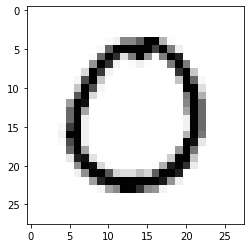

In [19]:
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in tqdm_notebook(range(training_epochs)):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1), end='\t')
        print('Cost =', '{:.9f}'.format(avg_cost))

        
    print("Learning finished")
    print("-"*2**6)

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

In [20]:
training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
                        X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
        
        if i % (total_batch/100) == 0:
            print('▒', end='')
    
    print(' 100% ')
    print('Epoch:', '%04d' % (epoch + 1), end='\t')
    print('Cost =', '{:.9f}'.format(avg_cost))

print()
print("Learning finished")

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0001	Cost = 2.786916257
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0002	Cost = 1.114659650
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0003	Cost = 0.893498648
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0004	Cost = 0.783550560
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0005	Cost = 0.712596882
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0006	Cost = 0.661214451
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0007	Cost = 0.622180101
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0008	Cost = 0.590205634
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0009	Cost = 0.564297961
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0010	Cost = 0.542579995
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0011	Cost = 0.524187728
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒

In [21]:
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.8911


Label:  [7]
Prediction:  [5]


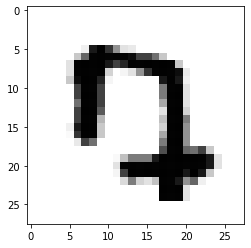

In [58]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [59]:
type(mnist.test.num_examples)

int

In [60]:
mnist.test.num_examples

10000

r: 9065
Label:  [5]
Prediction:  [5]


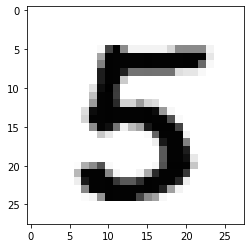

In [61]:
r = random.randint(0, mnist.test.num_examples - 1)
print("r:", r)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

r: 9946
Label:  [1]
Prediction:  [1]


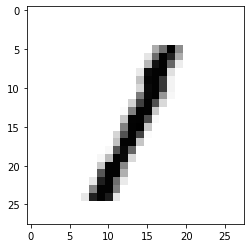

r: 1296
Label:  [6]
Prediction:  [6]


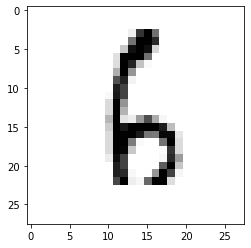

r: 2710
Label:  [7]
Prediction:  [7]


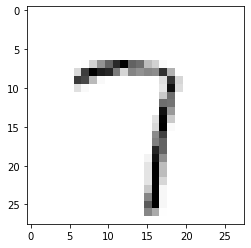

r: 1820
Label:  [1]
Prediction:  [1]


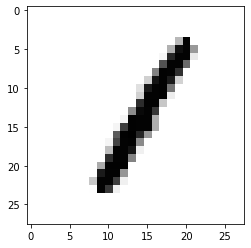

r: 5083
Label:  [5]
Prediction:  [5]


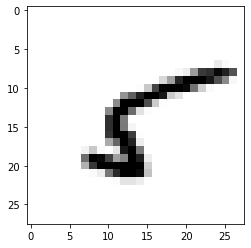

r: 3736
Label:  [7]
Prediction:  [7]


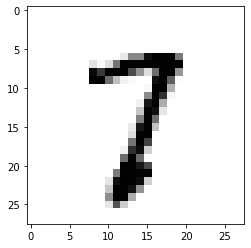

r: 2529
Label:  [1]
Prediction:  [1]


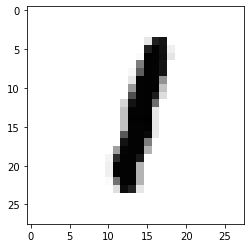

r: 3550
Label:  [6]
Prediction:  [6]


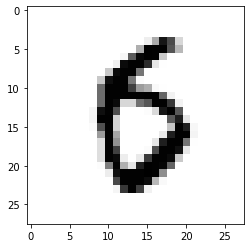

r: 7625
Label:  [0]
Prediction:  [0]


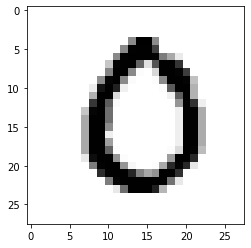

r: 8675
Label:  [4]
Prediction:  [4]


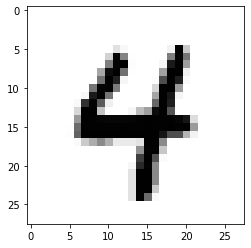

In [62]:
for i in range(10):
    r = random.randint(0, mnist.test.num_examples - 1)
    print("r:", r)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()